# Статистический анализ данных / Python. Задание No5
### MADE-12, Рогачев А. И.

## Заживление ран

На 26 пациентах было испытано экспериментальное лекарство, способствующее заживлению ран; для сравнения ещё к 26 пациентам применялась стандартная терапия. Измерялась площадь раны до начала терапии, после курса лечения и на заключительном визите
через длительное время после завершения лечения. Кроме того, приведена субъективная
оценка изменения состояния раны пациентом и врачом (wounds.csv).

Р: отличается ли эффективность экспериментального лекарства от эффективности стандартного?


<font color='purple'>Предисловие. Я попробовал сделать так, как Вы советовали в слаке, но, возможно я понял Вас неверно.
Использовал оценку пациента и врача как фактор, но мне кажется, в данной задаче делать это не совсем корректно.
Поэтому затем я провел множественную проверку гипотез. Результаты схожи (если я сделал все близко к тому, как в действительности нужно было сделать), но мне кажется, множественная проверка в данном случае более уместна. Но, если не прав- что поделать.</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('wounds.csv', sep=';',encoding='windows-1251')

In [3]:
df

,Лечение,Площадь раны до терапии,Площадь раны после курса препарата,Площадь раны заключительный визит,Общее клиническое впечатление исследователя,Общее клиническое впечатление пациента
0,Экспериментальное,1.00,1.00,1.00,без изменений,без изменений
1,Экспериментальное,1.10,0.25,0.00,очень значительное улучшение,очень значительное улучшение
2,Экспериментальное,1.40,0.30,0.10,значительное улучшение,значительное улучшение
3,Экспериментальное,1.60,1.50,1.40,без изменений,без изменений
4,Экспериментальное,1.70,0.25,0.00,очень значительное улучшение,очень значительное улучшение
5,Экспериментальное,1.90,1.70,3.00,без изменений,без изменений
6,Экспериментальное,2.70,0.20,0.16,незначительное улучшение,незначительное улучшение
7,Экспериментальное,4.00,0.30,0.00,значительное улучшение,значительное улучшение
8,Экспериментальное,4.14,4.14,3.74,без изменений,незначительное улучшение
9,Экспериментальное,4.60,2.90,2.20,значительное улучшение,значительное улучшение


In [4]:
Class_cols=['Лечение']
Num_cols=['Площадь раны до терапии','Площадь раны после курса препарата','Площадь раны заключительный визит']
Cat_cols=['Общее клиническое впечатление исследователя','Общее клиническое впечатление пациента']

Посмотрим на численные характеристики данных.

In [5]:
df.describe()

,Площадь раны до терапии,Площадь раны после курса препарата,Площадь раны заключительный визит
count,52.000000,50.000000,50.000000
mean,5.075962,2.414800,1.585200
std,3.127980,2.546329,2.442085
min,0.250000,0.000000,0.000000
25%,2.435000,0.250000,0.000000
50%,4.700000,1.700000,0.210000
75%,7.500000,3.692500,2.125000
max,13.000000,11.500000,9.000000


In [6]:
df.Лечение.value_counts()

Стандартное          26
Экспериментальное    26
Name: Лечение, dtype: int64

Классы сбалансированы (но это было ясно из задания).

Построим боксплоты для площади раны для различных типов лечения.

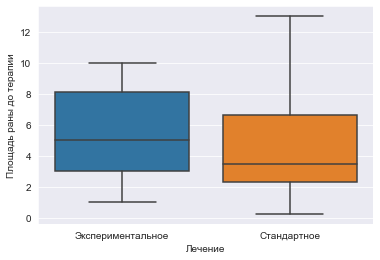

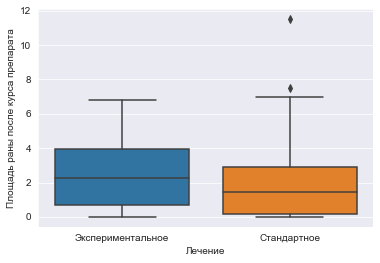

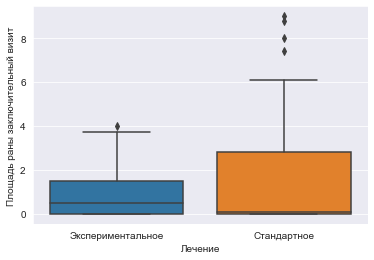

In [7]:
for col in Num_cols:
    sns.boxplot(x='Лечение', y=col, data=df)
    plt.show()

Перейдем к новым признакам, которые помогут понять, какое было изменение площади ран, что будет более наглядно описывать результат лечения (или его отсутствие), так как на графиках выше не учитывается информация о связи между начальной и конечной площадью той или иной раны.

In [42]:
new_cols=['Изменение площади раны после курса препарата','Изменение площади раны заключительный визит','Ratio']

In [9]:
df['Изменение площади раны после курса препарата']=df['Площадь раны до терапии']-df['Площадь раны после курса препарата']

In [10]:
df['Изменение площади раны заключительный визит']=df['Площадь раны до терапии']-df['Площадь раны заключительный визит']

Добавим признак отношения конечной площади раны к начальной (не наоборот, чтобы не получить неопределенность в случае равенства нулю конечной площади).

In [11]:
df['Ratio']= df.iloc[:,3]/df.iloc[:,1]

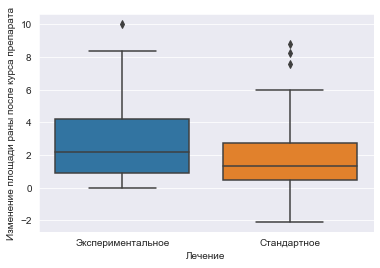

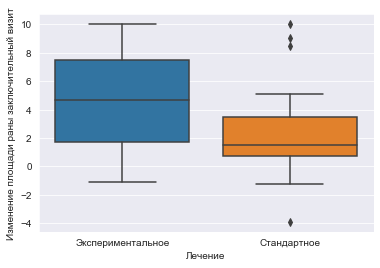

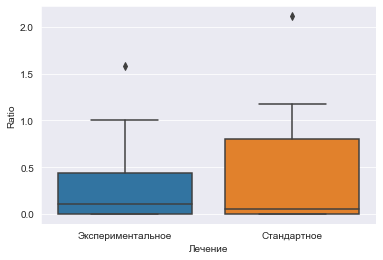

In [43]:
for col in new_cols:
    sns.boxplot(x='Лечение', y=col, data=df)
    plt.show()

In [13]:
from statsmodels.graphics.gofplots import qqplot

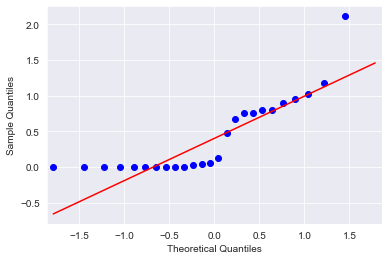

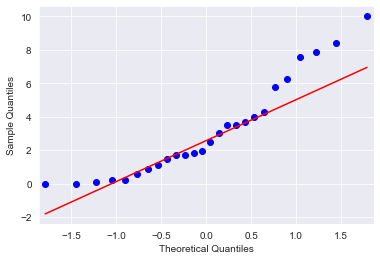

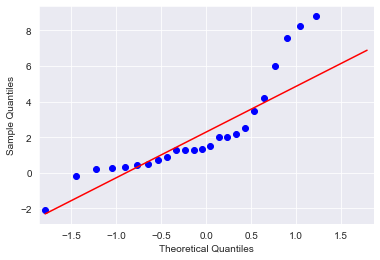

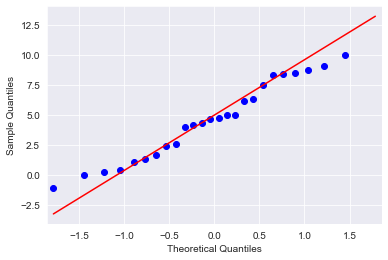

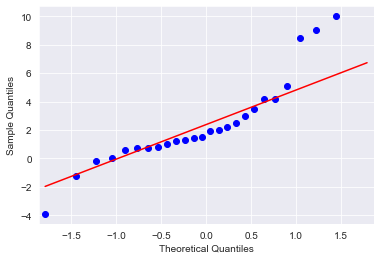

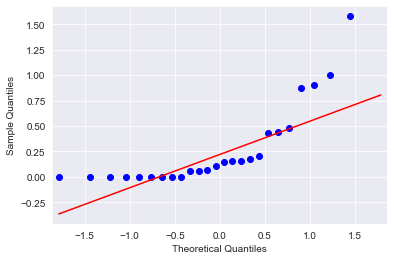

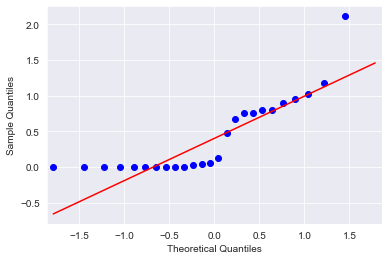

In [44]:
qqplot(df[df.Лечение == 'Экспериментальное']['Изменение площади раны после курса препарата'], line='q')
qqplot(df[df.Лечение == 'Стандартное']['Изменение площади раны после курса препарата'], line='q')
qqplot(df[df.Лечение == 'Экспериментальное']['Изменение площади раны заключительный визит'], line='q')
qqplot(df[df.Лечение == 'Стандартное']['Изменение площади раны заключительный визит'], line='q')
qqplot(df[df.Лечение == 'Экспериментальное']['Ratio'], line='q')
qqplot(df[df.Лечение == 'Стандартное']['Ratio'], line='q')

Видно, что распределение данных далеко от нормального. И размер выборки невелик. 

In [15]:
df.iloc[:,4].value_counts()

значительное улучшение          25
незначительное улучшение        11
без изменений                    7
очень значительное улучшение     7
легкое ухудшение                 1
Name: Общее клиническое впечатление исследователя, dtype: int64

In [16]:
df.iloc[:,5].value_counts()

значительное улучшение          21
незначительное улучшение        12
очень значительное улучшение    11
без изменений                    7
Name: Общее клиническое впечатление пациента, dtype: int64

In [17]:
df.iloc[:,4].unique()

array(['без изменений', 'очень значительное улучшение',
       'значительное улучшение', 'незначительное улучшение', nan,
       'легкое ухудшение'], dtype=object)

In [18]:
df.iloc[:,5].unique()

array(['без изменений', 'очень значительное улучшение',
       'значительное улучшение', 'незначительное улучшение', nan],
      dtype=object)

Посмотрим, как связаны оценки исследователя и пациента.


In [19]:
pd.crosstab(df.iloc[:,4], df.iloc[:,5])

Общее клиническое впечатление пациента,без изменений,значительное улучшение,незначительное улучшение,очень значительное улучшение
Общее клиническое впечатление исследователя,,,,
без изменений,5,0,2,0
значительное улучшение,0,20,1,4
легкое ухудшение,1,0,0,0
незначительное улучшение,1,1,9,0
очень значительное улучшение,0,0,0,7


Можно заметить, что если есть отличия в оценках, в целом, пациенты склонны оценивать результат более положительно, чем исследователи.

In [25]:
pd.crosstab(df.iloc[:,0], df.iloc[:,4])

Общее клиническое впечатление исследователя,без изменений,значительное улучшение,легкое ухудшение,незначительное улучшение,очень значительное улучшение
Лечение,,,,,
Стандартное,3,13,1,7,2
Экспериментальное,4,12,0,4,5


In [26]:
pd.crosstab(df.iloc[:,0], df.iloc[:,5])

Общее клиническое впечатление пациента,без изменений,значительное улучшение,незначительное улучшение,очень значительное улучшение
Лечение,,,,
Стандартное,4,10,7,5
Экспериментальное,3,11,5,6


Представим категориальные фичи в виде числовых оценок улучшения состояния.

In [21]:
def to_num(x):
    if x=='без изменений':
        return 0
    if x=='незначительное улучшение':
        return 1
    if x=='значительное улучшение':
        return 2
    if x=='очень значительное улучшение':
        return 3
    if x=='легкое ухудшение':
        return -1
    if x=='незначительное улучшение':
        return 1
    return -3
        
    

In [22]:
df['doc_num']=df['Общее клиническое впечатление исследователя'].apply(to_num)

In [23]:
df['pat_num']=df['Общее клиническое впечатление пациента'].apply(to_num)

In [24]:
df.head()

,Лечение,Площадь раны до терапии,Площадь раны после курса препарата,Площадь раны заключительный визит,Общее клиническое впечатление исследователя,Общее клиническое впечатление пациента,Изменение площади раны после курса препарата,Изменение площади раны заключительный визит,Ratio,doc_num,pat_num
0,Экспериментальное,1.0,1.00,1.0,без изменений,без изменений,0.00,0.0,1.000000,0,0
1,Экспериментальное,1.1,0.25,0.0,очень значительное улучшение,очень значительное улучшение,0.85,1.1,0.000000,3,3
2,Экспериментальное,1.4,0.30,0.1,значительное улучшение,значительное улучшение,1.10,1.3,0.071429,2,2
3,Экспериментальное,1.6,1.50,1.4,без изменений,без изменений,0.10,0.2,0.875000,0,0
4,Экспериментальное,1.7,0.25,0.0,очень значительное улучшение,очень значительное улучшение,1.45,1.7,0.000000,3,3


### 1). Anova

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

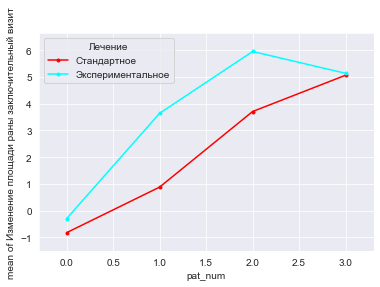

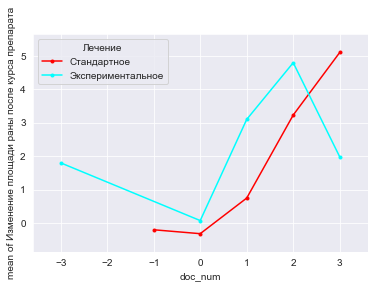

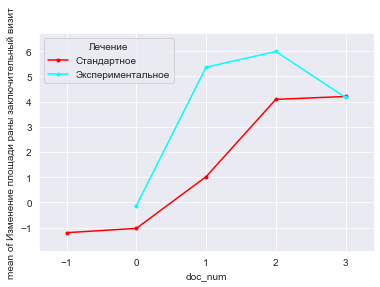

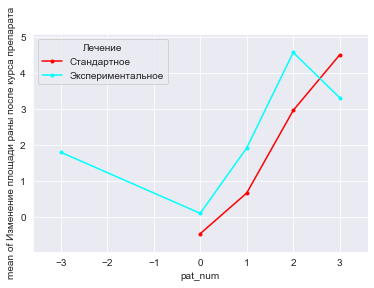

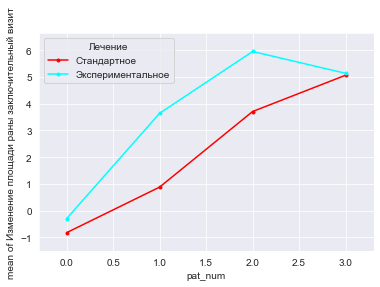

In [26]:
interaction_plot(df.doc_num, df.iloc[:,0], df.iloc[:,6])
interaction_plot(df.doc_num, df.iloc[:,0], df.iloc[:,7])
interaction_plot(df.pat_num, df.iloc[:,0], df.iloc[:,6])
interaction_plot(df.pat_num, df.iloc[:,0], df.iloc[:,7])

Можно заметить, что, в целом, графики для экспериментального исследования лежат выше стандартных, т.е. изменения площади больше в случае экспериментального лечения.

In [49]:
formula = 'df.iloc[:,7] ~ C(df.iloc[:,0]) + C(df.iloc[:,-2]) +C(df.iloc[:,-1]) + C(df.iloc[:,0]):C(df.iloc[:,-2])+C(df.iloc[:,0]):C(df.iloc[:,-1])+C(iloc[:,-1]):C(df.iloc[:,-2])'
model = ols('df.iloc[:,7] ~ C(df.iloc[:,0]) + C(df.iloc[:,-2]) +C(df.iloc[:,-1]) + C(df.iloc[:,0]):C(df.iloc[:,-2])+C(df.iloc[:,0]):C(df.iloc[:,-1])+C(df.iloc[:,-1]):C(df.iloc[:,-2])', df).fit()
aov_table = anova_lm(model, typ=3)
aov_table.round(6)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 10
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
Intercept,44.843908,1.0,6.434012,0.015955
"C(df.iloc[:, 0])",15.616260,1.0,2.240554,0.143659
"C(df.iloc[:, -2])",87.363177,5.0,2.506899,0.049032
"C(df.iloc[:, -1])",82.145586,4.0,2.946474,0.034132
"C(df.iloc[:, 0]):C(df.iloc[:, -2])",56.107815,5.0,1.610022,0.194262
"C(df.iloc[:, 0]):C(df.iloc[:, -1])",22.683528,4.0,0.813634,0.525341
"C(df.iloc[:, -1]):C(df.iloc[:, -2])",538.522706,20.0,3.863247,0.001460
Residual,236.973900,34.0,NaN,NaN


К сожалению, гипотеза об отсутсвии разницы эффективности лечений не отвергается.

### 2). Множественная проверка гипотез.

Выборки невелики, данные не распределены нормально. Применим критерий Краскела-Уоллиса

P.S. Я так понимаю, что, например, Манна — Уитни применять не стоит, так как у нас есть совпадающие значения фичей в выборках, а для данного критерия лучше, чтобы таких совпадений не было. 

In [31]:
from scipy.stats import kruskal

In [32]:
pvals=[]

In [33]:
for col in ['Изменение площади раны после курса препарата','Изменение площади раны заключительный визит','Общее клиническое впечатление исследователя','Общее клиническое впечатление пациента','Ratio']:
    change_groups = list(cur_df[col] for _, cur_df in df.dropna().groupby('Лечение'))
    pvals.append(kruskal(*change_groups)[1])
    
    

In [34]:
#change_groups = list(cur_df['Изменение площади раны заключительный визит'] for _, cur_df in df.dropna().groupby('Лечение'))

In [35]:
pvals

[0.22720380950541208,
 0.0410186212046857,
 0.6061152567307515,
 0.8102169577715309,
 0.8730312189510235]

In [36]:
from statsmodels.sandbox.stats.multicomp import multipletests

Произведем поправку на множественую проверку гипотез.

In [38]:
multipletests(np.array(pvals).ravel())

(array([False, False, False, False, False]),
 array([0.6433355 , 0.18894394, 0.93889068, 0.9639824 , 0.9639824 ]),
 0.010206218313011495,
 0.01)

Ниодна из гипотез не отвергается. 

### Выводы.
1). Оценки пациентов и исследователей иногда расходятся. Пациенты склонны завышать оценку результатов лечения (или исследователи склонны занижать ее).

2). Гипотеза об отсутсвии различия между видами лечения не была отклонена. Какие могут быть причины?

    а). Можно заметить, что медиана разниц площадей ран после лечения для различных видов отличалась. Но имеет ли это смысл? Изначально, площади ран так же были разными. Поэтому абсолютное значение разницы площадей может быть не объективной оценкой успешности лечения. Для относительной оценки гипотеза была отклонена с бОльшим значением p-value.
    б). Не совсем понятно, в какой момент была получена оценка исследователя и пациента. Было ли это сделано в одно время? В одно время с финальным замером площади раны?
    в). Скорее всего, изменения площади ран не считались весомыми со стороны исследователей. Поэтому и оценки не сильно отличаются. Следовательно, действительно, нет сильной разницы между методами лечения.
    
3). Данных в таком объеме может быть не достаточно для выявления весомой (с точки зрения специалистов) разницы между методами. Так же, можно было бы применить более мощные статистические критерии.